# Let's Download the stock data of Apple and predict the future sales

In [2]:
import yfinance as yf

# Define the ticker symbol for Apple (AAPL) and the time period
ticker = 'AAL'
start_date = '2019-12-01'
end_date = '2023-12-31'

# Fetch the stock data from Yahoo Finance and store it in a DataFrame
apple_stock_data = yf.download(ticker, start=start_date, end=end_date)

# Display the DataFrame with the stock price data
print(apple_stock_data.shape)

[*********************100%%**********************]  1 of 1 completed

(1027, 6)


# Another set of sale data is downloaded for validation purpose

In [2]:
# Define the ticker symbol for Apple (AAPL) and the time period
ticker = 'AAL'
start_date = '2023-09-01'
end_date = '2024-06-15'

# Fetch the stock data from Yahoo Finance and store it in a DataFrame
test_data = yf.download(ticker, start=start_date, end=end_date)
print(test_data.shape)

[*********************100%%**********************]  1 of 1 completed

(198, 6)


# Data Preprocessing

In [3]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(apple_stock_data['Close'].values.reshape(-1,1))

In [4]:
#scale test data
scaled_test_data = scalar.fit_transform(test_data['Close'].values.reshape(-1,1))

# The train data contains the close price of the sales over last 60 days and the next day sale will be the train value. Hence, the model is trained to predict the close price of next day taking the input of last 60 day's close price

In [5]:
pred_days = 60
X_train = []
y_train = []

for x in range(pred_days, len(scaled_data)):
    X_train.append(scaled_data[x-pred_days:x, 0])
    y_train.append(scaled_data[x,0])

X_test = []
y_test = []

for x in range(pred_days, len(scaled_test_data)):
    X_test.append(scaled_test_data[x-pred_days:x, 0])
    y_test.append(scaled_test_data[x,0])

import numpy as np

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

C:\Users\Praveen\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.fit(X_train, y_train, epochs = 25)

Epoch 1/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0525
Epoch 2/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0112
Epoch 3/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0081
Epoch 4/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0078
Epoch 5/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0067
Epoch 6/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0067
Epoch 7/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0062
Epoch 8/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0051
Epoch 9/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0051
Epoch 10/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0053
Epoch 11/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0048
Epoch 12/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0045
Epoch 13/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0046
Epoch 14/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0046
Epoch 15/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0049
Epoc

In [8]:
prediction = model.predict(X_test)
prediction = scalar.inverse_transform(prediction)
print(len(prediction))
actual = test_data['Close'].values
actual = actual[60:len(actual)]

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
138


# Visualization of the Predicted stock price over actual stock price

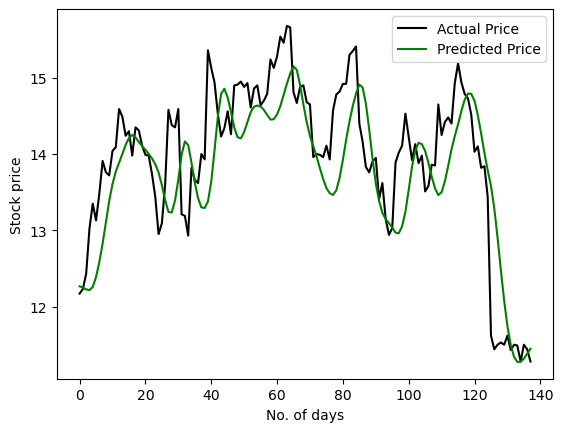

In [9]:
import matplotlib.pyplot as plt
plt.plot(actual, color='black', label = 'Actual Price')
plt.xlabel("No. of days")
plt.ylabel("Stock price")
plt.plot(prediction, color='green', label = 'Predicted Price')
plt.legend()
plt.show()

# From the above plot, we can see the trained model is able to predict the close price. Hence, the model can be used for next day's close price prediction.

Note: The close price may vary in realtime based on the market, should be used with caution.